# ATP Tennis 🎾 Bets

The goal here is to be able to determine the winner of a tennis game. We dispose of the following dataset that I am going the comment before analysing it.

Data description :

• tourney_id - tournament_id

• tourney_name - tournament_name

• surface - surface in which the match is played

• draw_size - the size of the draw

• tourney_level - tournament level

• tourney_date - starting date of the tournament

• match num - match number in a certain tournament

• id - player id

• seed - the seed of the player in that tournament

• entry - How did the player enter the tournaments?

• name - player name

• hand - hand of the player, right or left

• ht - the height of the player

• IOC - the country of origin

• age - age of the player

• score - final score in the match

• best_of - the maximum number of sets played

• round - the round in the tournament a match belongs to

• minutes - duration of the match in minutes

• ace - number of aces in the match 

• df - double faults

• svpt - serve percent

• 1stin - first serve in percent

• 1stWon - first serve winning percent

• 2ndWon - second serve winning percent

• SvGms - number of games played on serve (So, the maximum difference between w_SvGms and l_SvGms will be 1)

• bpSaved - breakpoints saved

• bpFaced - breakpoints faced

To predict the victory, first of all, I would like to make sure we are situated before the beginning of the game with the data. I mean we couldn't know before the end of the game for example the number of aces, double faults, duration total of a game etc... Besides, we can see there are many missing values. I am going to explain how I dealt with this issue.

Now let's see the dataset closer !

In [88]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from func import *

# To see the entire dataset
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Warning on low_memory
df = pd.read_csv('ATP.csv', low_memory=False)

In [89]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1968-580,Australian Chps.,Grass,64,G,19680119,001,110023,NaN,NaN,Richard Coulthard,R,NaN,AUS,NaN,NaN,NaN,107760,NaN,NaN,Max Senior,R,NaN,AUS,NaN,NaN,NaN,12-10 7-5 4-6 7-5,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-580,Australian Chps.,Grass,64,G,19680119,002,109803,NaN,NaN,John Brown,R,NaN,AUS,27.5208761123,NaN,NaN,106964,NaN,NaN,Ernie Mccabe,R,NaN,AUS,NaN,NaN,NaN,6-3 6-2 6-4,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-580,Australian Chps.,Grass,64,G,19680119,003,100257,NaN,NaN,Ross Case,R,NaN,AUS,16.2162902122,NaN,NaN,110024,15,NaN,Gondo Widjojo,R,NaN,INA,NaN,NaN,NaN,6-4 3-6 6-3 7-5,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-580,Australian Chps.,Grass,64,G,19680119,004,100105,5,NaN,Allan Stone,R,NaN,AUS,22.264202601,NaN,NaN,110025,NaN,NaN,Robert Layton,R,NaN,AUS,NaN,NaN,NaN,6-4 6-2 6-1,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-580,Australian Chps.,Grass,64,G,19680119,005,109966,NaN,NaN,Warren Jacques,R,NaN,AUS,29.8617385352,NaN,NaN,110026,NaN,NaN,Bert Kearney,R,NaN,AUS,NaN,NaN,NaN,6-4 6-1 7-5,5,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Here are the columns I wish to process. We can see that it resolve a major part of the missing values problem but that's not all.

In [90]:
df = df[
    [
         'tourney_id', 'winner_id', 'loser_id', 'winner_name', 'loser_name',
         'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_seed', 
         'loser_seed', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand', 'winner_ht', 'loser_ht', 
         'winner_ioc', 'loser_ioc', 'winner_age', 'loser_age', 'winner_rank', 'loser_rank', 'winner_rank_points',
         'loser_rank_points', 'round'
        ]
       ]
df = df.drop(columns=['winner_entry', 'loser_entry', 'winner_seed', 'loser_seed'])

In [91]:
# Dimensions of dataset

df.shape

(163966, 24)

* By dropping the rows with missing values we still have an acceptable quantity of data.

In [92]:
# Needs solution for NA values

df_na = df.dropna()
df_na.shape

(115273, 24)

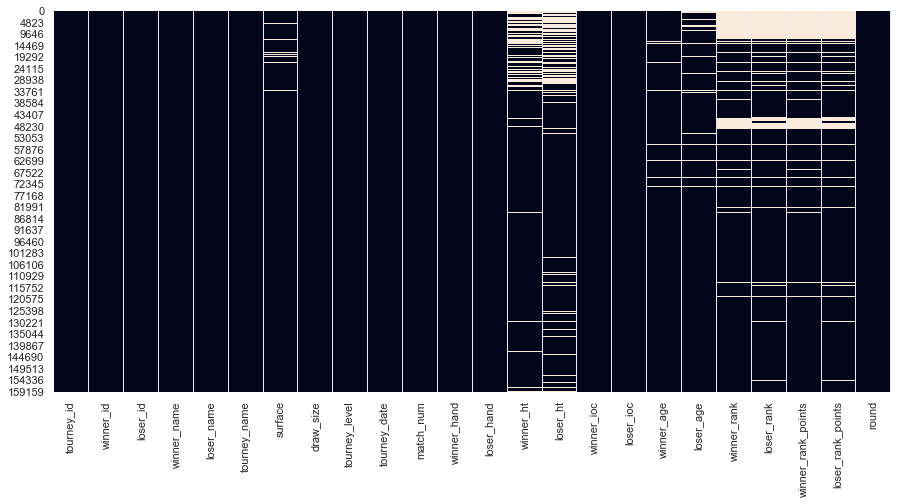

In [93]:
# See NA values

plt.figure(figsize=(15, 7))
sns.heatmap(df.isnull(), cbar=False);

In [94]:
# Drop bad row

df = df.drop(160636)
df = df.reset_index(drop=True)

In [95]:
df = df.dropna()

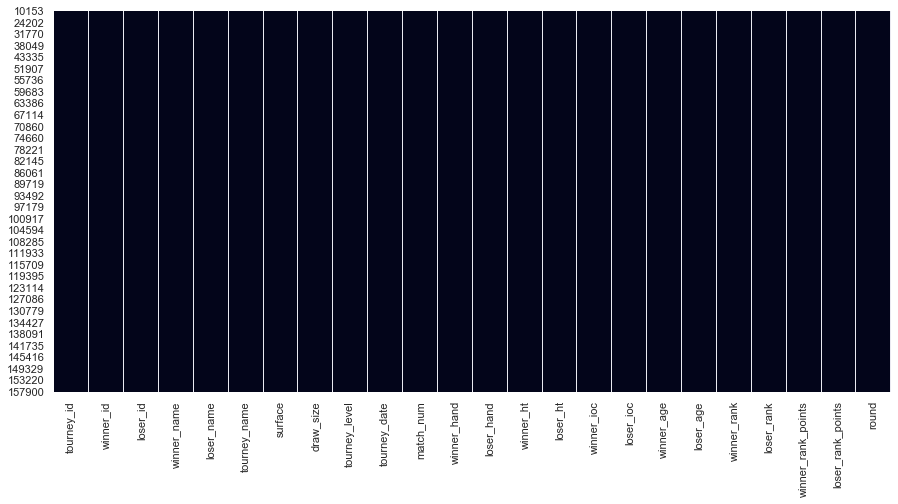

In [96]:
# See NA values

plt.figure(figsize=(15, 7))
sns.heatmap(df.isnull(), cbar=False);

* Now the dataset is full ! I am going to build an unique id for every game to be able to associate the final results to the games which is finally the most important.

In [97]:
# Build id unique

df = df.reset_index(drop=False)
df.rename(columns={'index':'id_u'}, inplace=True)
df['id_u'].nunique()

115272

In [98]:
# Print distincts values

for idx, col in enumerate(df):
    print(col)
    print('\n')
    print(df[col].value_counts())
    print('\n')

id_u


16376    1
69387    1
38712    1
40761    1
34618    1
        ..
90745    1
96890    1
94843    1
84604    1
24588    1
Name: id_u, Length: 115272, dtype: int64


tourney_id


2008-520                          127
2003-520                          127
1995-560                          127
1993-520                          127
2004-520                          127
                                 ... 
2016-M-DC-2016-WG-M-FRA-CRO-01      1
2012-D016                           1
2011-D078                           1
2004-D017                           1
2015-D026                           1
Name: tourney_id, Length: 4412, dtype: int64


winner_id


103819    1060
100656     887
101736     837
100284     818
104745     791
          ... 
100027       1
100716       1
103560       1
104624       1
101524       1
Name: winner_id, Length: 1529, dtype: int64


loser_id


102148    429
104022    366
103852    366
102434    352
102035    351
         ... 
100731      1
101125      1
10364

* I would like, instead of having a winner and a loser, just two players.

In [99]:
# Create columns with dates

df['year'] = df.tourney_date.astype(str).str[:4]
df['month'] = df.tourney_date.astype(str).str[:6].str[4:]
df['day'] = df.tourney_date.astype(str).str[6:]
df['date'] = df['year'] + '-' + df['month'] + '-' + df['day']

In [100]:
# Indicator for exploration

df['number_victory'] = df.groupby(['winner_name']).size().to_frame('size')

In [101]:
# Rename columns

df.columns = df.columns.str.replace('winner_','_1_')
df.columns = df.columns.str.replace('loser_','_2_')

In [102]:
# Columns I don't use
# Due to a lack of time I won't use number_victory (number of victory per winner)

df = df.drop(columns=['tourney_name', 'tourney_id', 'number_victory'])

* I am now cleaning the date column. It could be use to do time series and visualization.

# Exploration

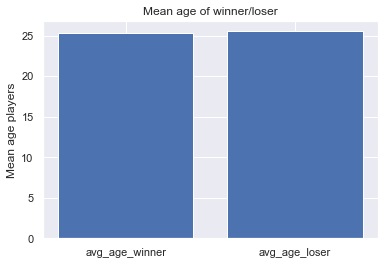

In [15]:
# Age has influence on winning/losing ?

df['_1_age'] = pd.to_numeric(df['_1_age'])
df['_2_age'] = pd.to_numeric(df['_2_age'])

# Create bars

w = df[['_1_age', '_2_age']].mean()[0]
l = df[['_1_age', '_2_age']].mean()[1]
vals = [w, l]
bars = ('avg_age_winner', 'avg_age_loser')

plt.bar(bars, vals)
plt.title('Mean age of winner/loser')
plt.ylabel('Mean age players')

# Show graphic
plt.show()

# Age doesn't make difference on game winning.

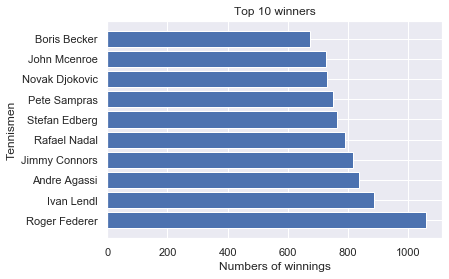

In [16]:
# Top 10 winners
winnings = df.groupby(['_1_name']).agg({'_1_name':'count'})
winnings.rename(columns={'_1_name':'num_win'}, inplace=True)
winnings = winnings.sort_values(['num_win'], ascending=False)
winnings = winnings.reset_index()
winnings = winnings.head(10)

num = winnings['num_win'].tolist()
bars = winnings['_1_name']
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()

plt.barh(y_pos, num)
plt.yticks(y_pos, bars)
plt.xlabel('Numbers of winnings')
plt.ylabel('Tennismen')
plt.title('Top 10 winners')
plt.show()

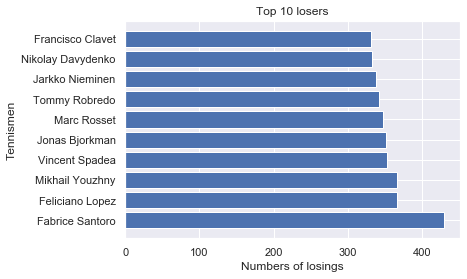

In [17]:
# Top 10 losers
losers = df.groupby(['_2_name']).agg({'_2_name':'count'})
losers.rename(columns={'_2_name':'num_lose'}, inplace=True)
losers = losers.sort_values(['num_lose'], ascending=False)
losers = losers.reset_index()
losers = losers.head(10)

num = losers['num_lose'].tolist()
bars = losers['_2_name']
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()

plt.barh(y_pos, num)
plt.yticks(y_pos, bars)
plt.xlabel('Numbers of losings')
plt.ylabel('Tennismen')
plt.title('Top 10 losers')
plt.show()

* USA has played many more games than the others countries.

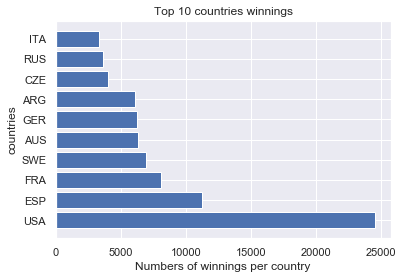

In [18]:
# Top 10 winners
winners = df.groupby(['_1_ioc']).agg({'_1_ioc':'count'})
winners.rename(columns={'_1_ioc':'num_win'}, inplace=True)
winners = winners.sort_values(['num_win'], ascending=False)
winners = winners.reset_index()
winners = winners.head(10)

num = winners['num_win'].tolist()
bars = winners['_1_ioc']
y_pos = np.arange(len(bars))

fig, ax = plt.subplots()

plt.barh(y_pos, num)
plt.yticks(y_pos, bars)
plt.xlabel('Numbers of winnings per country')
plt.ylabel('countries')
plt.title('Top 10 countries winnings')
plt.show()

      num_win
USA  0.212784
ESP  0.097769
FRA  0.070000
SWE  0.060249
AUS  0.054974


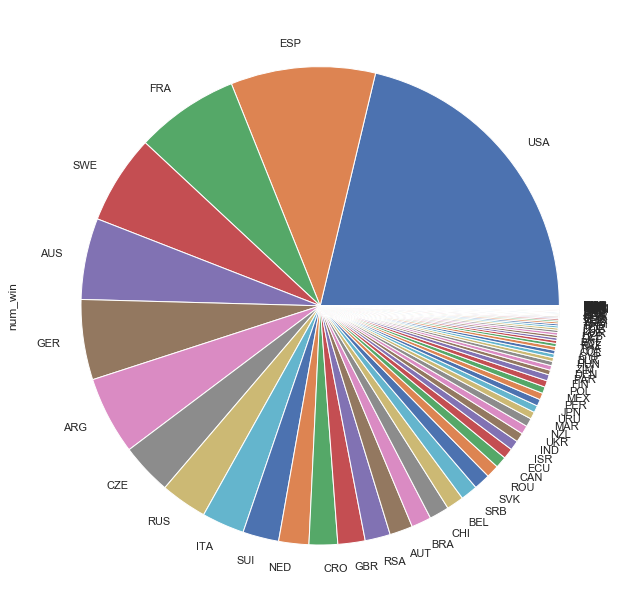

In [19]:
df_win_country = df[['_1_ioc']]
df_win_country.rename(columns={'_1_ioc':'num_win'}, inplace=True)
df_win_country = df_win_country.num_win.value_counts(normalize=True)
df_win_country.plot(kind='pie', subplots=True, figsize=(22, 11));
print(pd.DataFrame(df_win_country).head())

     num_lose
USA  0.193855
ESP  0.086777
FRA  0.074745
GER  0.060856
AUS  0.059824


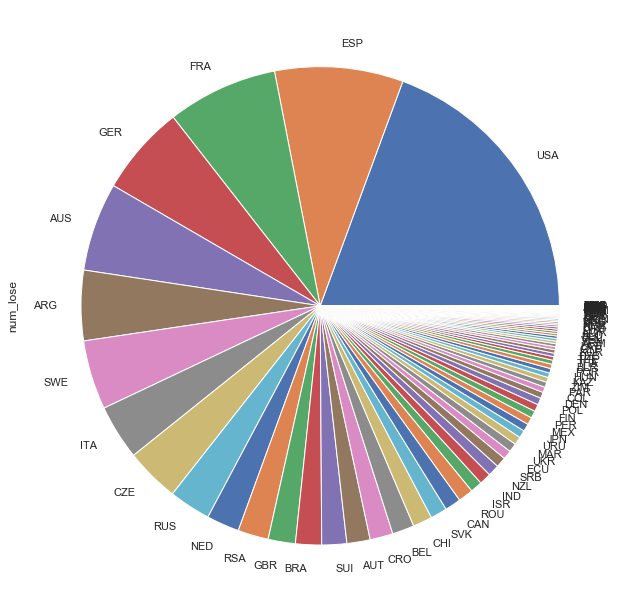

In [20]:
df_lose_country = df[['_2_ioc']]
df_lose_country.rename(columns={'_2_ioc':'num_lose'}, inplace=True)
df_lose_country = df_lose_country.num_lose.value_counts(normalize=True)
df_lose_country.plot(kind='pie', subplots=True, figsize=(22, 11));
print(pd.DataFrame(df_lose_country).head())

* Let's, now bluid the y matrix (target). We need to be able to find a winner but also a loser.

In [21]:
df['win_bool'] = 1

df_reversed = df.copy()

df_reversed[[
    '_1_hand', '_1_ht', '_1_ioc', '_1_age', '_1_rank', '_1_rank_points',
    '_2_hand', '_2_ht', '_2_ioc', '_2_age', '_2_rank', '_2_rank_points'
    
            ]]  = df_reversed[[
    '_2_hand', '_2_ht', '_2_ioc', '_2_age', '_2_rank', '_2_rank_points',
    '_1_hand', '_1_ht', '_1_ioc', '_1_age', '_1_rank', '_1_rank_points'
]]

df_reversed['win_bool'] = 0
df = df.append(df_reversed)

In [22]:
print(df[df['win_bool'] == 1].shape)
print(df[df['win_bool'] == 0].shape)
print(df.shape)

(115272, 28)
(115272, 28)
(230544, 28)


In [23]:
# Make one game be unique

df = df.sort_values(by='id_u')
df = df.drop_duplicates(subset='id_u')

In [24]:
df.shape

(115272, 28)

* Use a label enconding to be able to process the data with a machine learning algorithm.

In [25]:
# Encoding and change types

list_1 = [
    '_1_ht', '_1_age', '_1_rank', '_1_rank_points',
    '_2_ht', '_2_age', '_2_rank', '_2_rank_points'
         ]

list_2 = [
    '_2_hand', '_2_ioc', 'round', 'surface', 'tourney_level', '_1_hand', '_1_ioc'
]

for i in list_1:
    df[i] = pd.to_numeric(df[i])

for i in list_2:
    df[i] = LabelEncoder().fit_transform(df[i].astype(str))

* I would like now to observe the correlation between the features. We can see the the target is not correlated with any of the other feature. It is a good sign. It means we didn't make the mistake to let a feature who can explain the target.

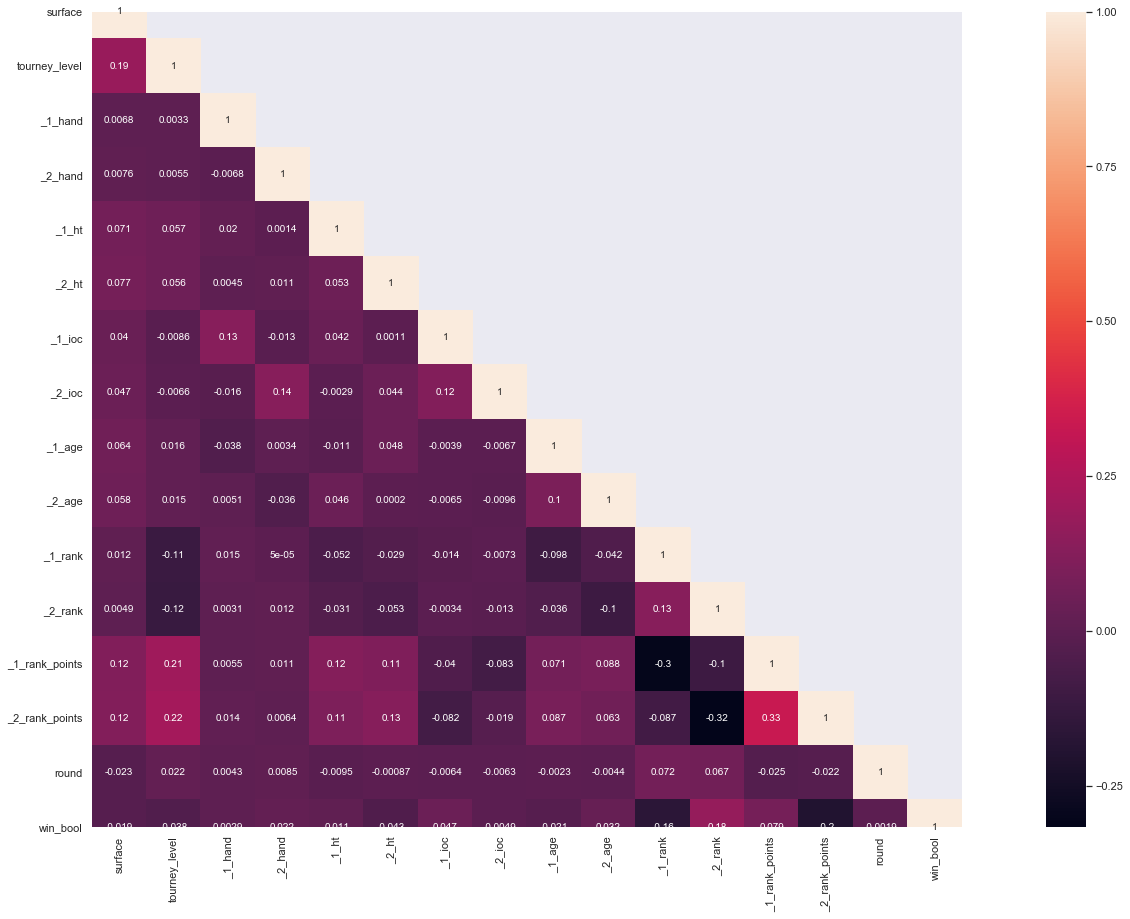

In [26]:
df_corr = df[[
    'surface', 'draw_size', 'tourney_level', 'match_num', '_1_hand', 
    '_2_hand', '_1_ht', '_2_ht', '_1_ioc', '_2_ioc', 
    '_1_age', '_2_age', '_1_rank', '_2_rank', '_1_rank_points', '_2_rank_points', 'round',
    'win_bool'
]]
plot_corr_matrix(df_corr)

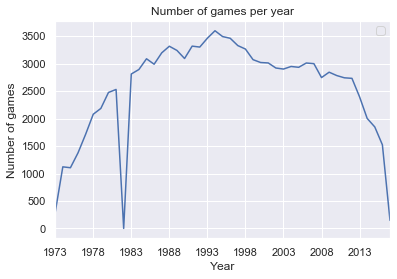

In [27]:
df[['year', '_1_id']].groupby(['year']).agg({'_1_id':'count'}).plot()
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.title('Number of games per year')
plt.show()

# Prediction

In [28]:
# Deal with missing values

for i in list_1:
    df[i] = df[i].fillna(df[i].mean())
    
for i in list_2:
    df[i] = df[i].fillna(0)

In [29]:
# Shuffle of the rows

df = df.sample(frac=1).reset_index(drop=True)
df.head()

,id_u,_1_id,_2_id,_1_name,_2_name,surface,draw_size,tourney_level,tourney_date,match_num,_1_hand,_2_hand,_1_ht,_2_ht,_1_ioc,_2_ioc,_1_age,_2_age,_1_rank,_2_rank,_1_rank_points,_2_rank_points,round,year,month,day,date,win_bool
0,92750,101647,100837,Byron Black,Jeremy Bates,0,32,0,19951002,013,1,1,175,180,85,30,25.987680,33.286790,43,106,816,430,5,1995,10,02,1995-10-02,1
1,135642,104571,103813,Marcos Baghdatis,Jarkko Nieminen,3,32,0,20070212,030,1,0,183,185,21,28,21.656400,25.557837,17,20,1365,1320,8,2007,02,12,2007-02-12,1
2,82933,101990,100581,Richard Krajicek,John Mcenroe,3,96,5,19920313,085,0,1,180,196,81,55,33.059548,20.257358,34,27,892,1059,4,1992,03,13,1992-03-13,0
3,35857,100221,100377,Carlos Kirmayr,Colin Dowdeswell,1,64,0,19791008,045,1,1,173,185,11,30,29.040383,24.407940,78,75,0,0,5,1979,10,08,1979-10-08,1
4,110122,101948,102856,Pete Sampras,Gustavo Kuerten,3,8,3,19991122,006,1,1,190,185,11,82,23.197810,28.279261,3,5,2563,2384,7,1999,11,22,1999-11-22,0


* I keep the ids of the games.

In [30]:
# Drop names and ids

names_ids = df[['_2_name', '_1_name', '_1_id', '_2_id', 'id_u']]
df = df.drop(columns=['_2_name', '_1_name', '_1_id', '_2_id', 'tourney_date', 'year', 'month', 'day', 'date'])

In [31]:
# Build the two matrix X an y

y = df['win_bool']
X = df.drop(columns=["win_bool"]).copy()

In [32]:
# Train and Test datasets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
# Keep the indexes to merde predictions to games after.

idx_train = x_train[['id_u']]
del x_train['id_u']

idx_test = x_test[['id_u']]
del x_test['id_u']

In [34]:
# Models

models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB', GradientBoostingClassifier()))

accuracies = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    accuracies.append(accuracy)
    names.append(name)
    msg = "%s: %f" % (name, accuracy)
    print(msg)

LR: 0.655630
Random Forest: 0.672951
CART: 0.613296
GB: 0.685530


Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data. To perform CV we need to keep aside a sample/portion of the data on which is do not use to train the model, later us this sample for testing/validating. There are many methods

In [59]:
gbc = GradientBoostingClassifier(
    loss='deviance',
    learning_rate=0.1,
    n_estimators=300,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=9,
    min_samples_leaf=3,
    max_depth=4,
    init=None,
    random_state=3
)

In [60]:
pred = gbc.fit(x_train, y_train).predict(x_test)
y_train_proba = gbc.predict_proba(x_train)[::,1]
y_pred_proba = gbc.predict_proba(x_test)[::,1]

In [47]:
model_cv_score = cross_val_score(gbc, x_train, y_train, cv=5, scoring='roc_auc')

print("=== Classification Report ===")
print(classification_report(y_test, pred))

print('\n')

print("=== Weighted Report ===")
print(precision_recall_fscore_support(y_test, pred, beta=1.0, 
                                      labels=None, pos_label=1, average='weighted', 
                                      warn_for=('precision', 'recall', 'f-score'), 
                                      sample_weight=None))
print('\n')

print("=== All AUC Scores ===")
print(model_cv_score)

print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Gradient Boosting: ", model_cv_score.mean())

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.70      0.71      0.70     17452
           1       0.70      0.69      0.70     17130

    accuracy                           0.70     34582
   macro avg       0.70      0.70      0.70     34582
weighted avg       0.70      0.70      0.70     34582



=== Weighted Report ===
(0.7007884379389864, 0.700798103059395, 0.7007849713787687, None)


=== All AUC Scores ===
[0.78 0.77 0.78 0.77 0.78]


=== Mean AUC Score ===
Mean AUC Score - Gradient Boosting:  0.774261900167331


* I did a small gridsearch to help me find the best estimators but with a Gradient boosting which computes its trees in serie it takes a really long time that I don't have.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Build a classification task using 3 informative features

param_grid = { 
    'n_estimators':[100, 200, 300],
    'max_depth':[2, 4, 6]
}

CV_m = GridSearchCV(estimator=gbc, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
CV_m.fit(x_train, y_train)
print(CV_m.best_params_)

* Eventhough the gridsearch tells me # {'max_depth': 6, 'n_estimators': 300} are the best parameters I choose to reduce the max_depth to 4 te avoid the over-fitting. I the trees are smaller we construct less rules and we can generalize better.

Train Accuracy: 0.7218614450365597 
Train AUC: 0.7217011444859632 
Train Confusion Matrix:
[[30074 10661]
 [11782 28173]]
Test Accuracy: 0.7005378520617662 
Test AUC: 0.7004036390231018 
Test Confusion Matrix:
[[12475  4977]
 [ 5379 11751]]


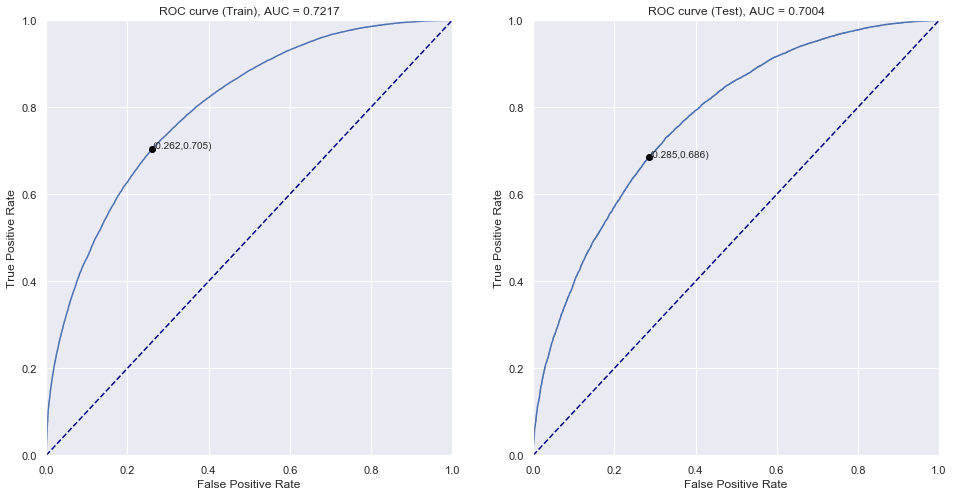

0.5053357862304839

In [61]:
plot_roc(y_train, y_train_proba, y_test, y_pred_proba)

* There is no over-fitting according to the AUCs curves. The algorithm seems to generalize well seeing the very small difference between train and test sets.

Confusion matrix, without normalization
[[12338  5114]
 [ 5268 11862]]
Normalized confusion matrix
[[0.71 0.29]
 [0.31 0.69]]


<Figure size 432x288 with 0 Axes>

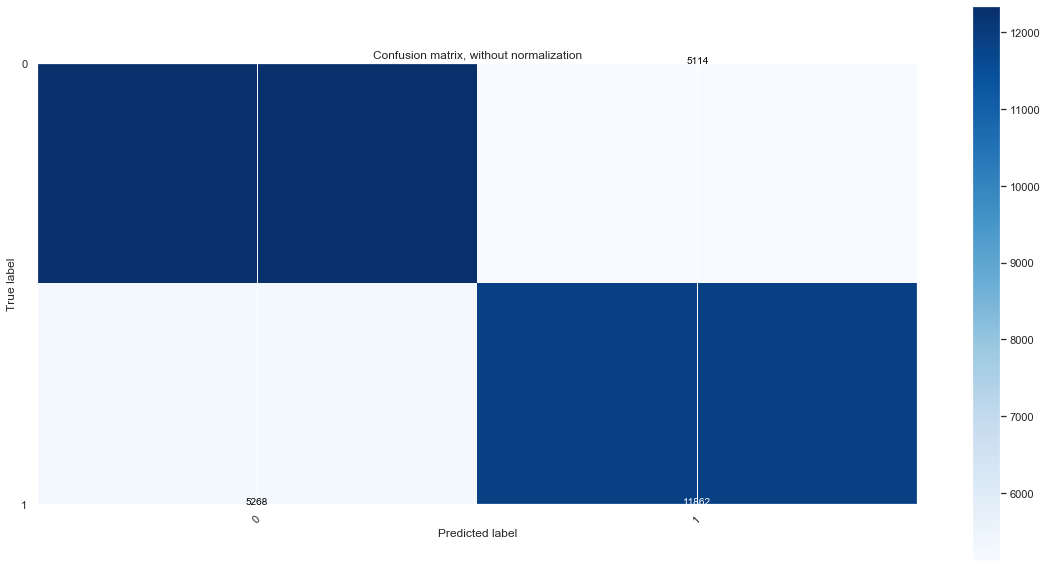

<Figure size 432x288 with 0 Axes>

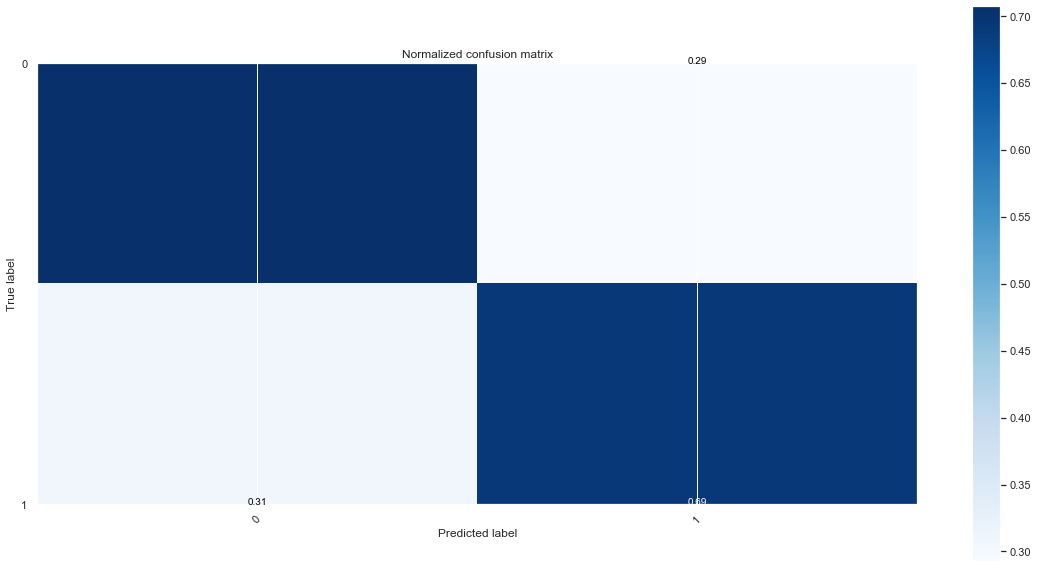

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure();
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization');

# Plot normalized confusion matrix
plt.figure();
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix');

plt.show()

* We can predict 70% of the winners which is good.

In [63]:
from collections import OrderedDict
import collections

percentiles = (np.argsort(np.argsort(pred)[::-1]) * 10 / (len(pred) -1)).astype(int)
collections.Counter(percentiles), percentiles, pred
crosstab_decile = pd.crosstab(y_test, percentiles)
print(pd.crosstab(y_test, percentiles))
print()

resultat = pd.DataFrame({'FLG_Win' : y_test, 'Y_Proba' : y_pred_proba, 
                         'Classe_decile' : percentiles, 'Prediction': pred})
print(resultat.head())
print()

print(resultat.groupby('Classe_decile')['Y_Proba'].agg((['min', 'max','mean'])))
print()

percentiles = (np.argsort(np.argsort(pred)[::-1]) * 100 / (len(pred) - 1)).astype(int)
collections.Counter(percentiles), percentiles, pred
t = pd.crosstab(y_test, percentiles)

collections.Counter(percentiles), percentiles, pred
t = pd.crosstab(y_test, percentiles, normalize=True)

print(t.iloc[0:100, 90:101].T)
print()

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

col_0       0     1     2     3     4     5     6     7     8     9   10
win_bool                                                                
0         1008  1033  1047  1047  1201  2415  2405  2419  2450  2427   0
1         2451  2425  2411  2411  2257  1043  1053  1039  1008  1031   1

        FLG_Win   Y_Proba  Classe_decile  Prediction
28793         1  0.437041             10           0
71448         0  0.534520              2           1
115156        0  0.433352              5           0
4934          0  0.281582              5           0
74045         0  0.867501              2           1

                    min       max      mean
Classe_decile                              
0              0.500131  0.969474  0.692390
1              0.500048  0.976044  0.696815
2              0.500021  0.969441  0.693107
3              0.500322  0.977424  0.693153
4              0.071160  0.970563  0.658527
5              0.027292  0.499728  0.303769
6              0.021610  0.499978  0

* Order of the probabilities by deciles to create more indicators for evaluation and see if the model orders well. It is just an idea I would like to explore more.

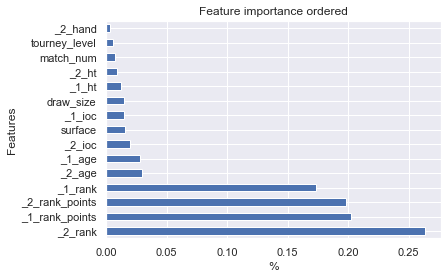

In [64]:
features_importance(gbc, df)

* I plot the important features ranked. I previously saw that seed and entry do not have such a big importance so I took the liberty to not use it. It also reduce considerably the amount of missing values so it's a good news.

In [65]:
# Table of results

y_pred_proba = pd.DataFrame(y_pred_proba, columns=['probabilities'])
pred = pd.DataFrame(pred, columns=['predictions'])
idx_test = idx_test.reset_index(drop=True)
frames = [y_pred_proba, pred, idx_test]
table_result = pd.concat(frames, axis=1)

In [66]:
table = pd.merge(table_result, names_ids, how='inner', on=['id_u'])

In [67]:
table['Wins'] = table['predictions'].map({0:'Player 2', 1:'Player 1'})

In [68]:
table.head(16)

,probabilities,predictions,id_u,_2_name,_1_name,_1_id,_2_id,Wins
0,0.437041,0,116832,Andrei Pavel,Tommy Haas,103163,102318,Player 2
1,0.534520,1,159642,Leonardo Mayer,John Isner,104545,104919,Player 1
2,0.433352,0,114260,Thomas Enqvist,Jan Michael Gambill,102998,102358,Player 2
3,0.281582,0,129360,Mark Philippoussis,Gilles Muller,104180,102882,Player 2
4,0.867501,1,44962,Harold Solomon,Adriano Panatta,100214,100286,Player 1
5,0.822794,1,138189,Lukas Dlouhy,Andy Roddick,104053,104160,Player 1
6,0.409584,0,124899,Jonas Bjorkman,Mardy Fish,103888,102035,Player 2
7,0.202745,0,73711,Jens Woehrmann,Marian Vajda,101119,101393,Player 2
8,0.522171,1,142917,Michael Berrer,Illya Marchenko,105011,103582,Player 1
9,0.126933,0,30959,Erik Van Dillen,Brian Gottfried,100261,100231,Player 2


Here is the final table with the propositions of bets according to our studies :
* 1 means _1_name is going to win the game
* 0 means _1_name is going to lose the game

- We can find the probability of the answer who could help to see how certain is the algorithm to bet on a player.
- The name and id of the 2 players.
- The id of the game to eventually seethe indicators of the game then.
- The prediction and a columns Wins which is basically the same but more appropriate for someone who wants to bet.

To conclude I would say that we have an efficient model because we can predict 70% of the winners as winners. 

* If I had time I would have :
    * Make a better data exploration and use the temporal variable to see if the players havec for example better periods in their career which as probably a significant influence on the model.
    * Use Poisson's Law which is a mathematical concept that transposes averages into a probability of variable results within a distribution. It is probably very helpful to help to bet.
    * Order the probabilities of the model by deciles and see if it orders well. I started to do it but I unfortunately can't finish it.
    * Some columns are correlated between them I could make a linear combination to reduce the dimension of the dataset to see if it has an impact on the prediction.

* It took me 6.5 hours to do this notebook.